# 1. Problema de selección

**Entrada**: Secuencia de $n$ números $[a_1,a_2,a_3,...,a_n]$ y un índice $i \in [0,n]$ .

**Salida**: Elemento $x\in A$, que es mayor o igual a exactamente $i-1$ elementos de $A$.

El elemento $x$ se conoce como **estadístico de orden $i$-ésimo** para el conjunto $A$.

# 2. Pivot Selection

El algoritmo **Pivot Selection** recibe un arreglo de números y retorna el índice de uno de los elementos que será utilizado como pivote.

## 2.1 Código de Pivot Selection

El siguiente código muestra una implementación del algoritmo **Pivot Selection**.

In [1]:
import random
def pivotSelection(a, ini, fin, comparaciones = 0, verbose = False):
    if fin <= 0:
      return fin, comparaciones

    i = ini
    medianaTotal = 0
    auxM = []
    m = 0

    #Se recorre el arreglo
    for i in range(ini, (fin+1), 5):
        if verbose == True: print("\nIndice i =",i)
        comparaciones+=1
        if(i > fin-4):
            if verbose == True: print("El grupo tiene menos de 5 elementos")
            k = fin
        else:
            if verbose == True: print("El grupo es de 5 elementos")
            k = i+4
        aux = a[i:(k+1)]
        if verbose == True: print("Sub-Arreglo actual",aux)
        if verbose == True: print("Indice del ultimo elemento del sub-arreglo =",k)
        aux = insert_sort(aux)
        mediana = int((len(aux)-1)/2)
        if verbose == True: print("Grupo ordenado:",aux)
        if verbose == True: print("Mediana =", aux[mediana])
        auxM.append(aux[mediana])
    auxM = insert_sort(auxM)
    if verbose == True: print("Arreglo de Medianas ", auxM)
    m = int((len(auxM)-1)/2)
    if verbose == True: print("Elemento mediana =",auxM[m])
    med = 0
    while a[med] != auxM[m] and med < fin:
        med+=1
    if verbose == True: print("Pivote de la mediana de las medianas =", med)
    return med, comparaciones

#InsertSort
def insert_sort(a):
    for i in range(1, len(a)):
        c = i
        while a[c] < a[c-1] and c > 0:
            a[c], a[c-1] = a[c-1], a[c]
            c-=1
    return a

In [2]:
# Ejemplo
a = [9,2,4,5,3,11,21,33,41,58,69,12,7,8,13,99,0,17,47]
comparaciones = 0
print("Entrada: ",a)
c, comparaciones = pivotSelection(a, 0, (len(a)-1),comparaciones, False)
print("\nSalida: ",c)
print("Número de Comparaciones:", comparaciones)

Entrada:  [9, 2, 4, 5, 3, 11, 21, 33, 41, 58, 69, 12, 7, 8, 13, 99, 0, 17, 47]

Salida:  11
Número de Comparaciones: 4


## 2.2. Descripción de la función
La función **Pivot Selection** recibe como entrada un arreglo de $n$ números y luego:

1. Verifica si el arreglo es de largo $1$, si es así, retorna el índice 0 --que corresponde al primer y único elemento del arreglo, por ello su mediana--.

2. De lo contrario divide el arreglo en grupos de 5 elementos cada uno. El último grupo puede ser de menos de 5 elementos.

3. Luego encuentra la mediana de cada uno de los grupos, y los ordena con el **InsertSort**.

4. Después encuentra la mediana de las medianas obtenidas antes.

5. Finalmente retorna el índice de la mediana de las medianas.

> Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa a medida que se ejecuta el código dentro de la función.

# 3. Select

El algoritmo **Select** recibe un índice $i$ y un arreglo de números y busca y encuentra el elemento que es mayor o igual a $i$ elementos del arreglo.

## 3.1. Código de Select

El siguiente código muestra una implementación del algoritmo **Select**.

In [3]:
#Algoritmo Select
def select(a, i, ini, fin, recursiones = 0, comparaciones = 0, verbose = False):
    if verbose == True: print("Trabajando con arreglo", a[ini:(fin+1)])
    comparaciones+=1
    if ini == fin:
        if verbose == True: print("Arreglo es de largo 1, retornando a[ini] = ",a[ini])
        return a[ini], recursiones, comparaciones

    if verbose == True: print("\nLlamando a PivotSelection")
    m, comparaciones = pivotSelection(a, ini, fin, comparaciones, verbose)
    if verbose == True: print("\nPivote obtenido = ", m)
    if verbose == True: print("Corresponde al elemento",a[m])

    m, comparaciones = partition(a, ini, fin, m, comparaciones, verbose)
    if verbose == True: print("Pivote",m,"=", a[m])
    comparaciones+=1
    if i > (m+1):
        recursiones+=1
        if verbose == True: print("\nElemento es mayor al pivote")
        valor, recursiones, comparaciones = select(a, i, (m+1), fin, recursiones, comparaciones, verbose)
    elif i < m:
        recursiones+=1
        if verbose == True: print("\nElemento es menor al pivote")
        valor, recursiones, comparaciones = select(a, i, ini, (m-1), recursiones, comparaciones, verbose)
    else:
        if verbose == True: print("Elemento encontrado!, retornando a[m] = ",a[m])
        return a[m], recursiones, comparaciones
    return valor, recursiones, comparaciones

#Función Partition
def partition(a, ini, fin, pivote, comparaciones, verbose = False):
    if verbose == True: print("Pivote indice",pivote)

    if verbose == True: print("Cambiando Pivote por último elemento")
    a[pivote], a[fin] = a[fin], a[pivote]
    if verbose == True: print("Arreglo después del cambio con el pivote:", a[ini:(fin+1)])

    i = ini

    if verbose == True: print("Ordenando arreglo:",a[ini:fin],"Pivote [",a[fin])
    for j in range((ini),(fin)):
        if verbose == True: print("\nComparando j=",j,"a[j]=", a[j],"\ncon pivote:",a[fin])

        comparaciones+=1
        if a[j] <= a[fin]:
            if verbose == True: print("Pivote es Mayor o igual\nIntercambiando i:", a[i]," con j:",a[j])
            a[i], a[j] = a[j], a[i]
            i+=1
        else:
            if verbose == True: print("Pivote es Menor, sin cambios")
        if verbose == True: print("Arreglo actual:",a[ini:(fin)])
        if verbose == True: print("con i=",i,"| j=",j+1)

    if verbose == True: print("Fin de la iteración, colocando pivote al centro")
    a[i], a[fin] = a[fin], a[i]
    if verbose == True: print("Arreglo final en partition:",a[ini:(fin+1)])
    return i, comparaciones

In [4]:
# Ejemplo
a = [25, 20, 64, 112, 72, 92, 43, 32, 106, 123, 19, 114, 120, 81, 67, 8, 97, 84, 59, 98, 29, 105, 3]
recursiones = comparaciones = 0
i = 7
print("Arreglo Entrada: ",a)
print("Buscando elemento número",i)
c, recursiones, comparaciones = select(a, i, 0, (len(a)-1), recursiones, comparaciones, False)
print("\nSalida: ",c)
print("Número de Recursiones:", recursiones)
print("Número de Comparaciones:", comparaciones)

Arreglo Entrada:  [25, 20, 64, 112, 72, 92, 43, 32, 106, 123, 19, 114, 120, 81, 67, 8, 97, 84, 59, 98, 29, 105, 3]
Buscando elemento número 7

Salida:  32
Número de Recursiones: 2
Número de Comparaciones: 54


## 3.2. Descripción del Algoritmo

El algoritmo **Select** recibe como entrada un arreglo de $n$ números y un índice $i$, luego:

1. Verifica si el arreglo es de largo $1$, si es así, retorna el elemento del arreglo.

2. De lo contrario llama a la función **Pivot Selection** la que retorna un valor $m$ el cual representa el índice del pivote.

3. Despues verifica si $m$ es igual a $i$, en cuyo caso retorna el elemento $m$.

3. De lo contrario llama a la función **Partition** la cual divide el arreglo utilizando como pivote el elemento $m$.

4. Después verifica si el índice $i$ es menor o mayor que $m$. Después, se llama recursivamente a sí mismo utilizando como entrada el lado izquierdo del pivote si $i < m$, y el lado derecho si $i > m$.

5. Finalmente retorna el valor que retorne las recursiones.

> Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa a medida que se ejecuta el código dentro de la función.

In [5]:
# Ejemplo
a = [7, 6, 1, 2, 8, 12, 13, 11, 3, 15, 10, 14]
recursiones = comparaciones = 0
i = 7
print("Arreglo Entrada: ",a)
print("Buscando elemento número",i)
c, recursiones, comparaciones = select(a, i, 0, (len(a)-1), recursiones, comparaciones, True)
print("\nSalida: ",c)
print("Número de Recursiones:", recursiones)
print("Número de Comparaciones:", comparaciones)

Arreglo Entrada:  [7, 6, 1, 2, 8, 12, 13, 11, 3, 15, 10, 14]
Buscando elemento número 7
Trabajando con arreglo [7, 6, 1, 2, 8, 12, 13, 11, 3, 15, 10, 14]

Llamando a PivotSelection

Indice i = 0
El grupo es de 5 elementos
Sub-Arreglo actual [7, 6, 1, 2, 8]
Indice del ultimo elemento del sub-arreglo = 4
Grupo ordenado: [1, 2, 6, 7, 8]
Mediana = 6

Indice i = 5
El grupo es de 5 elementos
Sub-Arreglo actual [12, 13, 11, 3, 15]
Indice del ultimo elemento del sub-arreglo = 9
Grupo ordenado: [3, 11, 12, 13, 15]
Mediana = 12

Indice i = 10
El grupo tiene menos de 5 elementos
Sub-Arreglo actual [10, 14]
Indice del ultimo elemento del sub-arreglo = 11
Grupo ordenado: [10, 14]
Mediana = 10
Arreglo de Medianas  [6, 10, 12]
Elemento mediana = 10
Pivote de la mediana de las medianas = 10

Pivote obtenido =  10
Corresponde al elemento 10
Pivote indice 10
Cambiando Pivote por último elemento
Arreglo después del cambio con el pivote: [7, 6, 1, 2, 8, 12, 13, 11, 3, 15, 14, 10]
Ordenando arreglo: [7, 6,

## 3.3. Ejemplo

Consideremos, por ejemplo, el arreglo aleatorio $a$ y el $i$-ésimo elemento buscado:

$a = [7, 6, 1, 2, 8, 12, 13, 11, 3, 15, 14, 10]$

$i = 7$

Primero verifica si el largo del arreglo es igual a 1, como este no es el caso llama a la función **Pivot Selection** para obtener el índice del Pivote:

**Pivot Selection** divide el arreglo en grupos de $5$ elementos y luego los ordena con **InsertSort**, y obtiene el valor de la mediana $m$ de cada grupo:

$g1 = [1, 2, 6, 7, 8]$

$mg1 = 6$

$g2 = [3, 11, 12, 13, 15]$

$mg2 = 12$

$g3 = [10, 14]$

$mg3 = 10$

luego obtiene el valor de la mediana de las medianas:

$medianas = [6, 10, 12]$

$mediana de medianas = 10$

y retorna el índice de este el cual es $11$.

Ahora llama a la función **Partition** con el elemento de índice $11$ como pivote. La función **Partition** ordena los valores menores al pivote a la izquierda y los mayores a la derecha, quedando el arreglo:

$[7, 6, 1, 2, 8, 3, 10, 11, 12, 15, 14, 13]$

Ahora verifica si el índice del pivote es igual a $i-1 = 6$, lo cual es cierto, por ende retorna el elemento $a[pivote] = 10$ y finaliza el algoritmo.

## 3.4. Ejecución del Algoritmo Paso a Paso (verbose = True)

Al utilizar la opción `verbose=True` se puede ver paso a paso lo que le ocurre al arreglo en cada iteración del algoritmo.

In [ ]:
# Ejemplo
a = [11, 81, 24, 30, 119, 108, 20, 18, 31, 103, 23, 57, 2, 78, 100, 122, 43, 80, 48, 124, 56, 35, 22]
recursiones = comparaciones = 0
i = 5
print("Arreglo Entrada: ",a)
print("Buscando elemento número",i)
c, recursiones, comparaciones = select(a, i, 0, (len(a)-1), recursiones, comparaciones, True)
print("\nSalida: ",c)
print("Número de Recursiones:", recursiones)
print("Número de Comparaciones:", comparaciones)

Arreglo Entrada:  [11, 81, 24, 30, 119, 108, 20, 18, 31, 103, 23, 57, 2, 78, 100, 122, 43, 80, 48, 124, 56, 35, 22]
Buscando elemento número 5
Trabajando con arreglo [11, 81, 24, 30, 119, 108, 20, 18, 31, 103, 23, 57, 2, 78, 100, 122, 43, 80, 48, 124, 56, 35, 22]

Llamando a PivotSelection

Indice i = 0
El grupo es de 5 elementos
Sub-Arreglo actual [11, 81, 24, 30, 119]
Indice del ultimo elemento del sub-arreglo = 4
Grupo ordenado: [11, 24, 30, 81, 119]
Mediana = 30

Indice i = 5
El grupo es de 5 elementos
Sub-Arreglo actual [108, 20, 18, 31, 103]
Indice del ultimo elemento del sub-arreglo = 9
Grupo ordenado: [18, 20, 31, 103, 108]
Mediana = 31

Indice i = 10
El grupo es de 5 elementos
Sub-Arreglo actual [23, 57, 2, 78, 100]
Indice del ultimo elemento del sub-arreglo = 14
Grupo ordenado: [2, 23, 57, 78, 100]
Mediana = 57

Indice i = 15
El grupo es de 5 elementos
Sub-Arreglo actual [122, 43, 80, 48, 124]
Indice del ultimo elemento del sub-arreglo = 19
Grupo ordenado: [43, 48, 80, 122, 1

# 4. Tiempo de ejecución

## 4.1. Mejor Caso

Analizando el algoritmo se puede ver que en el mejor caso **Select** tendrá un tiempo de ejecución $O(n)$ ya que solo llamará a la función **Partition** 1 vez la cual tiene tiempo de ejecución $O(n)$ y encontrará el estadístico de orden de inmediato.

## 4.2. Peor Caso

En el peor caso el Pivote siempre será un valor diferente al buscado y esto se realizará el mismo procedimiento como máximo $n$ veces, por ello el tiempo de ejecución en el peor caso sería $O(n^2)$.

## 4.3. Caso promedio

Para el caso base $n=1$ el algoritmo solo pregunta si el arreglo es de largo $1$ y luego retorna los valores sin realizar ninguna recursión, por esto se obtiene que $T(n)=O(1)$ si $n=1$.

Para el resto de casos se tiene que:

- La función **Partition** tiene un costo de $O(n)$ en todos los casos.

- Se asume que $A[p..r]$ contiene $n$ elementos, y cada elemento tiene las mismas probabilidades de ser elegido como Pivote. Por ello para cada $k$ de manera que $1 \leq k \leq n$, el sub-arreglo $A[p..q]$ tiene $k$ elementos menores o iguales que el pivote con una probabilidad de $\frac{1}{n}$, y esto se toma como el límite superior. Debido a que no se sabe si el elemento buscado es el Pivote, los elementos a la izquierda del pivote $A[p..q-1]$ o los de la derecha $A[q+1..r]$, se asume que el tiempo de ejecución $T(n)$ es monótonamente creciente, por ello se asume que el $i$-ésimo elemento siempre estará del lado con el mayor número de elementos, por ello la fórmula de recurrencia es:

$E[T(n)] = \sum\limits_{k=1}^{n} \frac{1}{n} * T(max(k − 1, n − k)) + O(n)$

$E[T(n)] \leq \frac{2}{n} \sum\limits_{k = \frac{n}{2}}^{n-1} E[T(k)] + O(n)$

Luego se demuestra que $E[T(n)] = O(n)$ por medio de inducción:

- Se asume que $E[T(n)] \leq cn$ donde $c$ es una constante que satisface las condiciones de recurrencia. Luego se asume que $T(n) = O(1)$ para $n$ menor a la constante. También elige una constante $a$ para la función **Partition** de manera que esté limitada por $a*n$ con $n > 0$. Con esto se tiene que:

$E[T(n)] \leq \frac{2}{n} \sum\limits_{k = \frac{n}{2}}^{n-1} ck + an$

$= cn - (\frac{cn}{4} - \frac{c}{2} - an)$

luego:

$n \geq \frac{\frac{c}{2}}{\frac{c}{4}-a} = \frac{2c}{c-4a}$

por ello si se asume que $T(n) = O(1)$ para $n < \frac{2c}{c-4a}$, entonces $E[T(n)] = O(n)$.

# 5. Correctitud 

## 5.1. Teorema (Correctitud de Select)

El algoritmo **Select** devuelve un elemento del arreglo que es mayor a $i-1$ elementos del arreglo.

## 5.4. Prueba del Teorema por medio de Inducción

La hipótesis $T(n)$ se basa en que **Select** retorna un elemento que es mayor a $i-1$ elementos.

### Caso base $n = 1$

Si $T(1)$ la función **Select** retorna un sólo elemento, que sería el único valor del arreglo, por lo que se cumpliría la condición.

### Resto de casos

Ahora hay que probar si $T(m)$ es verdadero para $m < n$, entonces lo será también para $T(n)$.

**Partition** dividirá el arreglo de largo $n$ en dos sub-arreglos de largo $mIzq$ y $mDer$, que están a la izquierda y derecha del pivote respectivamente. Entonces $mIzq , mDer < n$.

La función **Partition** es correcta, por lo que el sub-arreglo izquierdo tendrá los elementos menores al pivote y el sub-arreglo derecho tendrá los elementos mayores al pivote.

Si el pivote se encuentra en la $j$-ésima posición, entonces el pivote será mayor a $j-1$ elementos.

Con esto podemos concluir que la función **Select** es correcta.

# 6. Experimentos

## 6.1. Número de comparaciones

La gráfica de acontinuación muestra una comparación entre:

* la cantidad de comparaciones realizadas en el peor caso calculadas matemáticamente,
* la cantidad de comparaciones realizadas en el mejor caso calculadas matemáticamente
* y la cantidad de comparaciones realizadas en casos de prueba realizados con entradas aleatorias

para problemas con arreglos de entrada de largo $n \in [2,50]$ en los cuales el valor de los elementos es elejido aleatoriamente desde un conjunto de números entre 1 y 100 y estadísticos de orden aleatorios $i \in [1,n]$.

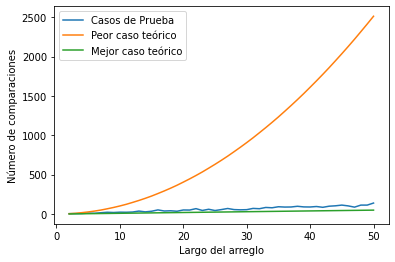

In [ ]:
import matplotlib.pyplot as plt
import math
import random

rangeS = 2
rangeF = 51
x=[n for n in range(rangeS,rangeF)]
# Peor Caso
y1=[((n*n)+(int(n/4))) for n in range(rangeS,rangeF)]
# Mejor caso
y2=[(n-1) for n in range(rangeS,rangeF)]
# Muestras Método de Pivote 1
y=[];


for n in range(rangeS,rangeF):
  a = random.sample(range(1, 100), n)
  recursiones = comparaciones = 0
  c = [];
  c, recursiones, comparaciones = select(a, random.randrange(1,(len(a))), 0, (len(a)-1), recursiones, 0)
  y.append(comparaciones)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Casos de Prueba", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel('Largo del arreglo')
plt.ylabel('Número de comparaciones')
plt.show()

### Análisis del gráfico

Los resultados que muestra el grafico indican que la cantidad de comparaciones reales se mantienen siempre muy cercanas del mejor caso incluso para largos de arreglo muy grandes, de esto se puede concluir que el algoritmo **Select** es muy bueno para ordenar independiente del largo del arreglo con un caso promedio muy cercano al mejor.

## 6.2. Tiempo de ejecución experimental

El siguiente gráfico muestra el comportamiento del tiempo de ejecución del algoritmo en relación al tamaño del arreglo de entrada, esto utilizando problemas generados aleatoriamente de arreglos de largo $n \in [2,500]$ y estadísticos de orden aleatorios $i \in [1,n]$.

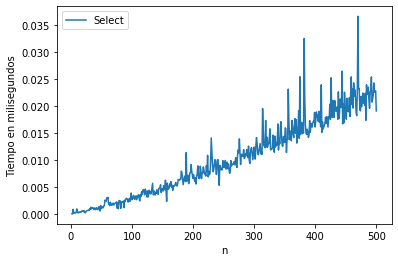

In [ ]:
import datetime
import random
from timeit import repeat

x=[];
y=[];

for n in range(2,501):
  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces insert_sort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import select", stmt=f"select({a}, {random.randrange(len(a))}, 0, (len({a})-1))", repeat=1, number=10)
  y.append(t)
  x.append(n)


plt.plot(x,y)
plt.legend(["Select"])

plt.xlabel('n')
plt.ylabel('Tiempo en milisegundos')
plt.show()

### Análisis del gráfico

Del gráfico se puede ver que, a diferencia del análisis teórico, el tiempo de ejecución experimental no se comporta de manera completamente lineal, sin embargo esto es posiblemente debido al método utilizado para seleccionar el pivote en esta implementación el cual podría ser optimizado o directamente reemplazado por uno más eficiente.

Los picos altos en el gráfico probablemente se deban debido al comportamiento impredecible de los procesadores, y quizás, a otros procesos que también lo están ocupando.

# 6.3. Comparación de tiempo de ejecución con Randomized Select

El siguiente gráfico muestra una comparación entre los tiempos de ejecución de los algoritmos **Select** (implementación propia) y **Randomized Select**.


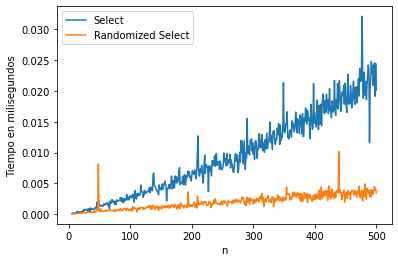

In [ ]:
import datetime
import random
from timeit import repeat

# Código para Randomized Select
def RSelect(x,k):
    if len(x) == 1: return x[0]
    else:
        xpart = RSelect_partition(x,random.randrange(len(x)))
        x = xpart[0] #arreglo partido
        j = xpart[1] #indice del pivote
        if j == k:
            return x[j]
        elif j > k:
            return RSelect(x[:j],k)
        else:
            k = k - j - 1
            return RSelect(x[(j+1):], k)

def RSelect_partition(x, pivot_index = 0):
    i = 0
    if pivot_index !=0: x[0],x[pivot_index] = x[pivot_index],x[0]
    for j in range(len(x)-1):
        if x[j+1] < x[0]:
            x[j+1],x[i+1] = x[i+1],x[j+1]
            i += 1
    x[0],x[i] = x[i],x[0]
    return x,i

# Código Simplificado para Select
# Algoritmo Select
def simple_select(a, i, ini, fin):
    if ini == fin: return a[ini]
    m = simple_pivotSelection(a, ini, fin)
    m = simple_partition(a, ini, fin, m)
    if i > (m+1): valor, recursiones, comparaciones = select(a, i, (m+1), fin)
    elif i < m: valor, recursiones, comparaciones = select(a, i, ini, (m-1))
    else: return a[m]
    return valor
#Partition
def simple_partition(a, ini, fin, pivote):
    a[pivote], a[fin] = a[fin], a[pivote]
    i = ini
    for j in range((ini),(fin)):
        if a[j] <= a[fin]:
            a[i], a[j] = a[j], a[i]
            i+=1
    a[i], a[fin] = a[fin], a[i]
    return i
#selección de pivote
def simple_pivotSelection(a, ini, fin):
    if fin <= 0: return fin
    i = ini
    medianaTotal = 0
    auxM = []
    m = 0
    for i in range(ini, (fin+1), 5):
        if(i > fin-4): k = fin
        else: k = i+4
        aux = a[i:(k+1)]
        aux = simple_insert_sort(aux)
        mediana = int((len(aux)-1)/2)
        auxM.append(aux[mediana])
    auxM = simple_insert_sort(auxM)
    m = int((len(auxM)-1)/2)
    med = 0
    while a[med] != auxM[m] and med < fin: med+=1
    return med

#Código InsertSort
def simple_insert_sort(a):
    for i in range(1, len(a)):
        c = i
        while a[c] < a[c-1] and c > 0:
            a[c], a[c-1] = a[c-1], a[c]
            c-=1
    return a

x=[];
y1=[];
y2=[];

for n in range(5,501):
  a = random.sample(range(1, 1000), n)
  x.append(n)

  t = repeat(setup="from __main__ import simple_select", stmt=f"simple_select({a}, {random.randrange(len(a))}, 0, (len({a})-1))", repeat=1, number=10)
  y1.append(t)
  t = repeat(setup="from __main__ import RSelect", stmt=f"RSelect({a}, {random.randrange(len(a))})", repeat=1, number=10)
  y2.append(t)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select", "Randomized Select"])

plt.xlabel('n')
plt.ylabel('Tiempo en milisegundos')
plt.show()

### Análisis del gráfico

En el gráfico se puede apreciar que la implementación propia del algoritmo **Select** tiene un mayor tiempo de ejecución en comparación a la versión de **Randomized Select**, especialmente con tamaños de arreglo más grande donde la diferencia aumenta mucho. Gracias a esto, se puede confirmar que la versión **Randomized Select** es mejor para encontrar el $i$-ésimo elemento incluso considerando los peores casos.